## Pendahuluan
Dataset ini bercerita tentang hasil pendapatan/fee terhadap media periklanan

In [2]:
# import libabry
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline


In [3]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Koran,Revenue
0,2301.0,378.0,692,221000.0
1,445.0,393.0,451,104000.0
2,172.0,459.0,693,120000.0
3,1515.0,413.0,585,165000.0
4,1808.0,108.0,584,179000.0


# ini merupakan tampilan urutan keatas (1-5)
kita lihat bahwa data tersbut memperbadingkan antara Pendapatan yang dihasilkan pada ilkan tersebut dengan media periklanan (TV,Radio,Koran,Revenue)


In [4]:
df.describe()

,TV,Radio,Koran,Revenue
count,206.000000,206.000000,207.000000,205.000000
mean,1470.412621,230.703883,304.685990,151765.853659
std,860.018916,148.709160,216.685161,52610.330426
min,7.000000,0.000000,3.000000,16000.000000
25%,737.250000,99.250000,127.000000,110000.000000
50%,1497.500000,220.000000,256.000000,160000.000000
75%,2194.750000,364.500000,451.000000,192000.000000
max,2964.000000,496.000000,1140.000000,270000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TV       206 non-null    float64
 1   Radio    206 non-null    float64
 2   Koran    207 non-null    int64  
 3   Revenue  205 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.6 KB


dari sini kita bisa digunakan bisa simpulkan bahwa data ini adalah 
masih ada data yang tidak ada nilai nya
keculia koran jadi nya kita drop aja

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 206
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TV       204 non-null    float64
 1   Radio    204 non-null    float64
 2   Koran    204 non-null    int64  
 3   Revenue  204 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.0 KB


In [7]:
# apakah ada data duplikat
sum(df.duplicated())

4

In [8]:
df.drop_duplicates(inplace=True)

/tmp/ipykernel_4246/3574656586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Revenue'])


<AxesSubplot: title={'center': 'Distribusi Table of Revenue'}, xlabel='Revenue', ylabel='Density'>

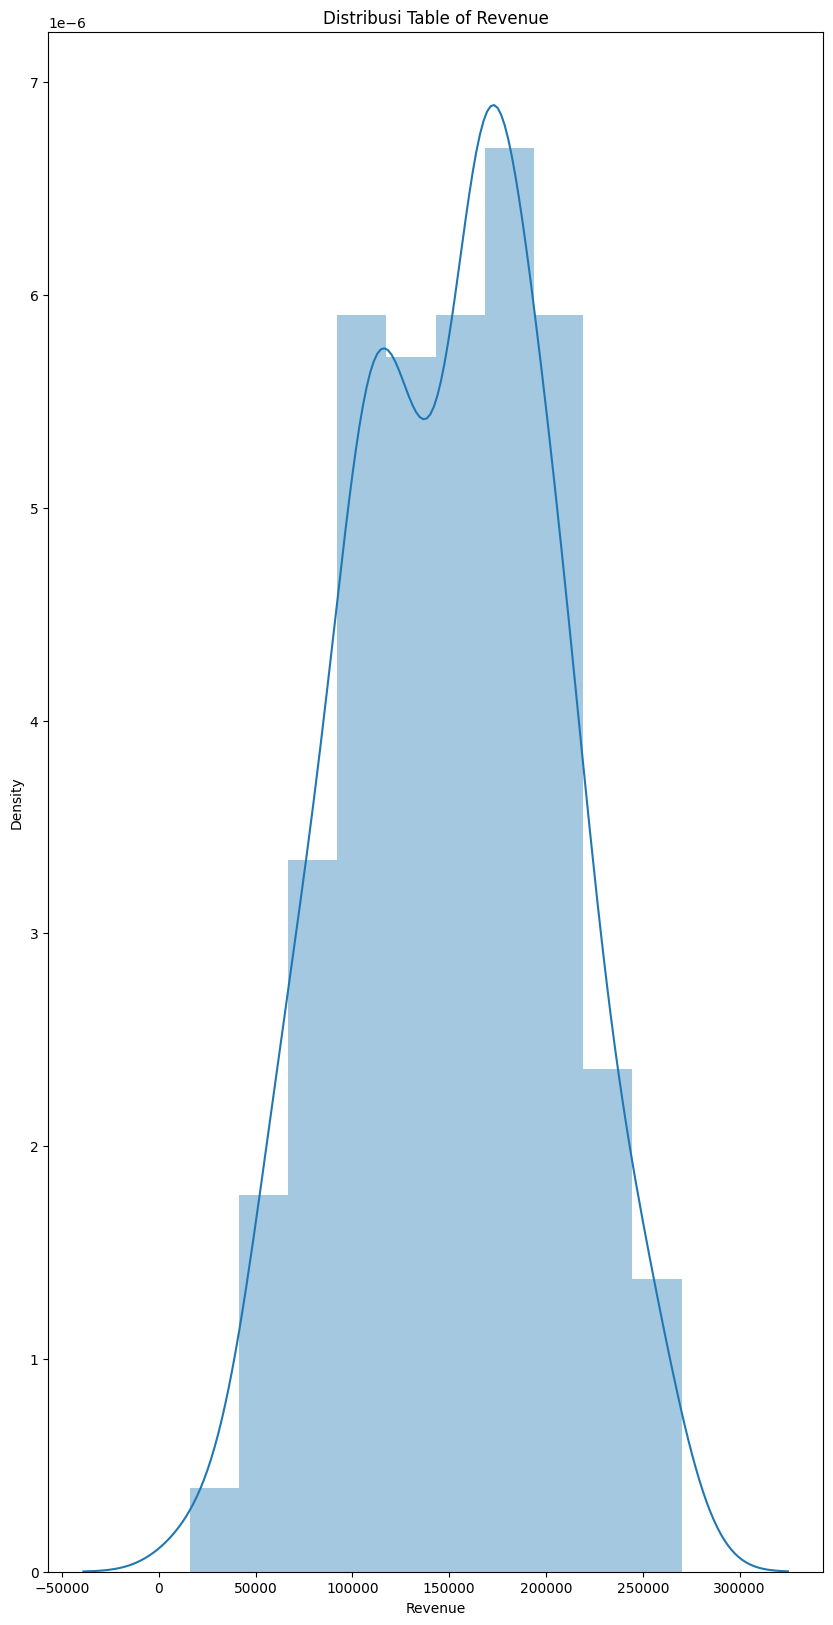

In [9]:
fig,ax=plt.subplots(figsize=(10,20))
plt.title('Distribusi Table of Revenue')
sns.distplot(df['Revenue'])


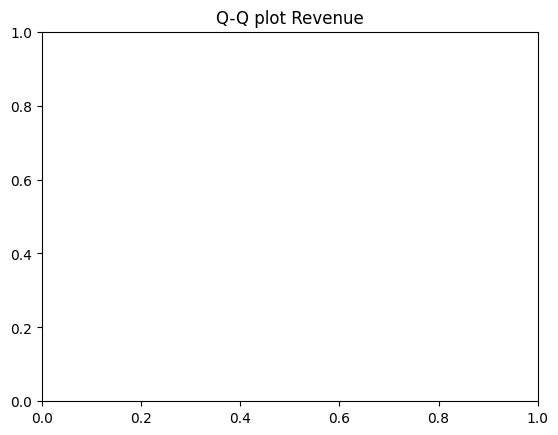

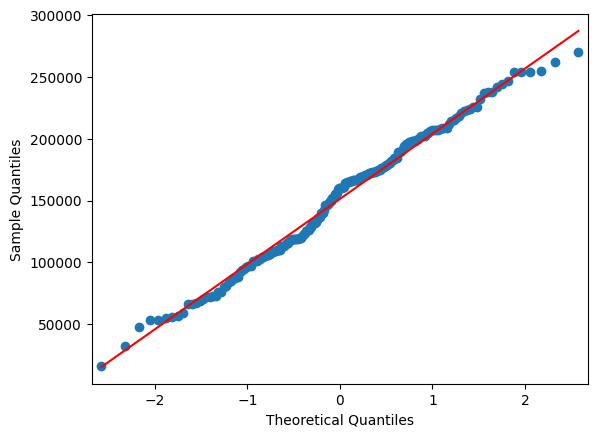

In [10]:
plt.title("Q-Q plot Revenue")
sm.graphics.qqplot(df.Revenue,line='s')
plt.show()

In [11]:
# pengujian distribusi normal
uji_revenue=shapiro(df.Revenue)
print(f'nilai pegujian pada revenue:\n{uji_revenue}')
alpha=.05
if uji_revenue.pvalue<.05:
    print('tolak H0 "{}" tidak berdistribusi normal'.format("Revenue"))
else:
    print('Gagal tolak tolak H0 "{}" berdistribusi normal'.format("Revenue"))
    

nilai pegujian pada revenue:
ShapiroResult(statistic=0.98752361536026, pvalue=0.07643628120422363)
Gagal tolak tolak H0 "Revenue" berdistribusi normal


nah setelah kita udah menguji tentang qqplot dan distribusi normal,bahwa dari data tersebut bahwasahnya 

In [12]:
df.columns

Index(['TV', 'Radio', 'Koran', 'Revenue'], dtype='object')

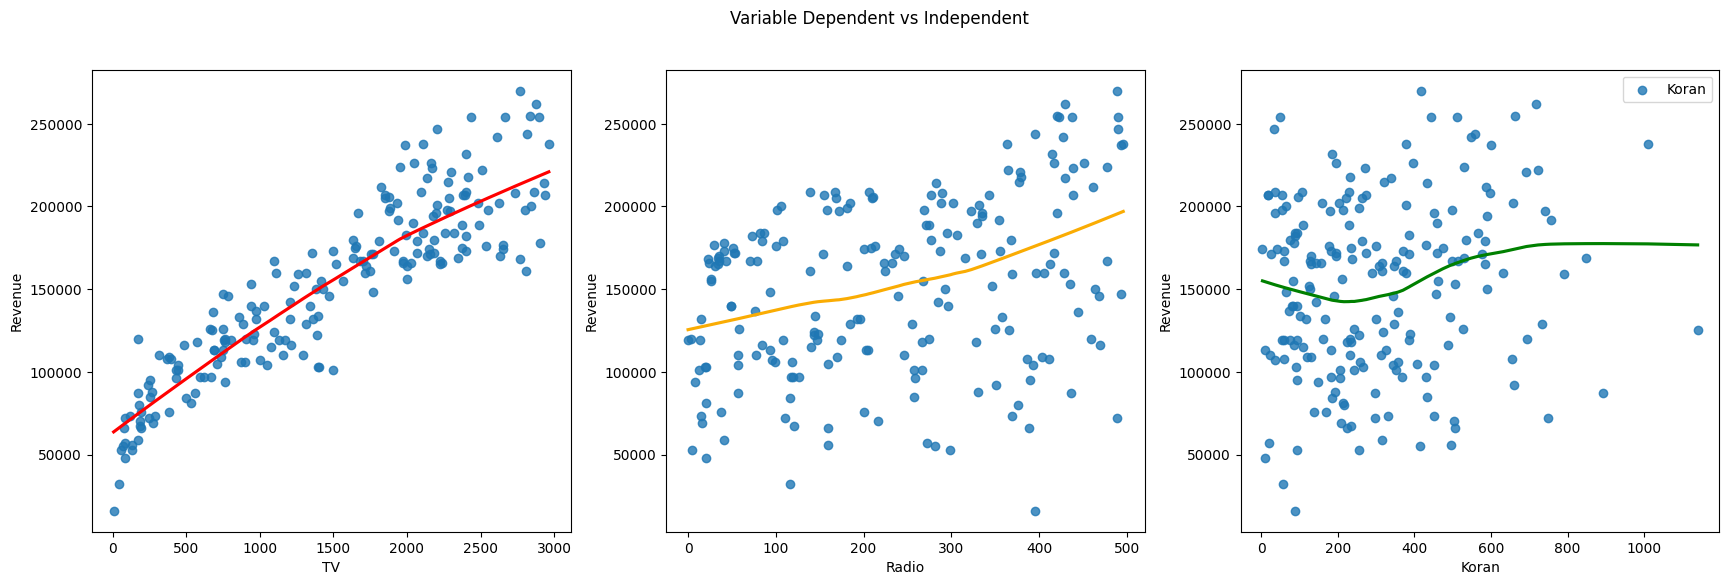

In [13]:
fig,axes=plt.subplots(1,3,figsize=(21,6),label=df.columns[:3])
plt.suptitle("Variable Dependent vs Independent")
sns.regplot(x=df.TV,y=df.Revenue,lowess=True,line_kws={'color':'red'},ax=axes[0],label='TV'),
sns.regplot(x=df.Radio,y=df.Revenue,lowess=True,line_kws={'color':'#FAAC03'},ax=axes[1],label='Radio'),
sns.regplot(x=df.Koran,y=df.Revenue,lowess=True,line_kws={'color':'green'},ax=axes[2],label='Koran')
plt.legend()


saya memperbedakan antara warna merah,kuning,serta hijau tersebut
dari sini bahwa data yang paling menonjol tersebut adalah data yang antara pendapatan(dependen) dan media iklan TV (independen) 

# saat nya mencari koerlasi antara variabel independen (regestor)

<AxesSubplot: >

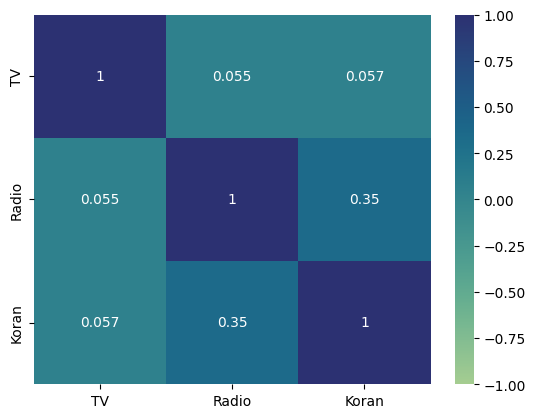

In [14]:
plt.Figure(figsize=(10,20))
sns.heatmap(df.drop('Revenue',axis=1).corr(),vmax=1,vmin=-1,center=0,annot=True,cmap='crest')

# Scaller

In [15]:
scaler_data=StandardScaler().fit_transform(df)
scaler_df=pd.DataFrame(scaler_data,columns=df.columns) # ini untuk mengkecilkan angka

scaler_df.head()

,TV,Radio,Koran,Revenue
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455


In [16]:
from sklearn.model_selection import train_test_split
X=scaler_df.drop('Revenue',axis=1).values # independens
Y=scaler_df.Revenue.values.reshape(-1,1) # dependens

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [17]:
print(f"""
Ukuran X Train ={len(x_train)}
Ukuran X Test ={len(x_test)}
Ukuran Y Train ={len(y_train)}
Ukuran Y Test ={len(y_test)}

""")


Ukuran X Train =160
Ukuran X Test =40
Ukuran Y Train =160
Ukuran Y Test =40




In [18]:
Input=sm.add_constant(x_train)
simple_reg=sm.OLS(y_train,Input,missing='drop').fit()
result=simple_reg.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     547.2
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           1.52e-82
Time:                        12:34:00   Log-Likelihood:                -26.579
No. Observations:                 160   AIC:                             61.16
Df Residuals:                     156   BIC:                             73.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.023      0.192      0.8

In [19]:
df_reg=sm.OLS(y_train,x_train[:,:2]).fit()
result=df_reg.summary()
print(result)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              830.8
Date:                Thu, 20 Oct 2022   Prob (F-statistic):                    1.43e-84
Time:                        12:34:00   Log-Likelihood:                         -26.777
No. Observations:                 160   AIC:                                      57.55
Df Residuals:                     158   BIC:                                      63.70
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Uji Klasik
dalam analisis lanjutan,analisis regesi perlu melakuakn uji asumsi klasik untuk mengetahui model yang terbentuk sudah sesuai dengan kriteria klasik atau mengalami bias
bias artinya adalah model yang bagus tapi tidak sesuai dengan kondisi yang ada

/tmp/ipykernel_4246/1426032560.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reg.resid,label='residual')


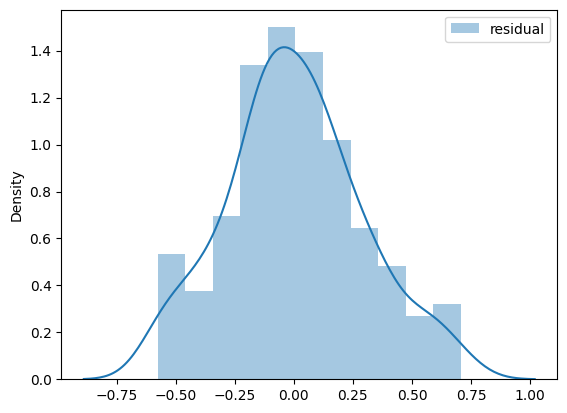

In [20]:
# uji distribusi normal/residual
sns.distplot(df_reg.resid,label='residual')
plt.legend()

In [21]:
# uji normalitas dengan menggunakan t_value
stat,p_value=shapiro(df_reg.resid)
print(f"nilai Stats={stat}")
print(f"nilai p_value={p_value}")
if p_value > .05:
    print('Gagal Tolak H0')
else:
    print('Tolak H0')


nilai Stats=0.9861204028129578
nilai p_value=0.11192647367715836
Gagal Tolak H0


# Prediksi Testing


In [22]:
df_predict=pd.DataFrame(x_test[:,:2],columns=['TV','Radio'])
df_predict['actual']=y_test
df_predict['predict']=df_reg.predict(x_test[:,:2])
df_predict.head()


,TV,Radio,actual,predict
0,-0.908957,-0.186635,-0.726758,-0.849357
1,-1.133153,-0.787595,-1.276973,-1.230228
2,-0.661408,-1.550611,-0.593948,-1.054968
3,1.665794,1.285378,1.948426,1.847897
4,0.270407,-1.044184,0.297780,-0.086942


# Evaluasi Data test


In [23]:
print('R Square:',format((metrics.r2_score(df_predict['actual'],df_predict['predict'])),'.2f'))
print('MSE',metrics.mean_squared_error(df_predict['actual'],df_predict['predict']))
print('MAE',metrics.mean_absolute_error(df_predict['actual'],df_predict['predict']))

R Square: 0.87
MSE 0.1609232380973814
MAE 0.2662183979559857


jadi perdiksi yang kita dapatkan adalah R-square adalah 0.87 atau 87% dimana ini bagus dikarenakan minimal bagusnya data adalah mencapai 80%